Hello Elvis!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text
</div>


# **SPRINT 9 PROJECT**

## **MACHINE LEARNING IN BUSINESS**

##  **PROJECT TITLE: OPTIMAL OIL WELL PLACEMENT FOR OILY GIANT**

**OBJECTIVES**
* Gather oil well data (quality and reserves) for three regions.
* Develop a model to predict reserve volume in new wells.
* Identify top-performing wells based on predicted reserves.
* Determine the region with the highest potential profit.
* Analyze profit and risks using Bootstrapping.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Download and prepare the data**

In [2]:
# loading the data
geo_df_0 = pd.read_csv("/datasets/geo_data_0.csv")
geo_df_1 = pd.read_csv("/datasets/geo_data_1.csv")
geo_df_2 = pd.read_csv("/datasets/geo_data_2.csv")

In [3]:
geo_df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
geo_df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
geo_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
geo_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# Remove the 'id' column as it's not needed for modeling
geo_df_0 = geo_df_0.drop('id', axis=1, errors ='ignore')
geo_df_1 = geo_df_1.drop('id', axis=1, errors ='ignore')
geo_df_2 = geo_df_2.drop('id', axis=1,errors ='ignore')
print(geo_df_0.head())
print()
print(geo_df_1.head())
print()
print(geo_df_2.head())

         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647

          f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305

         f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746


<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct
    
</div>

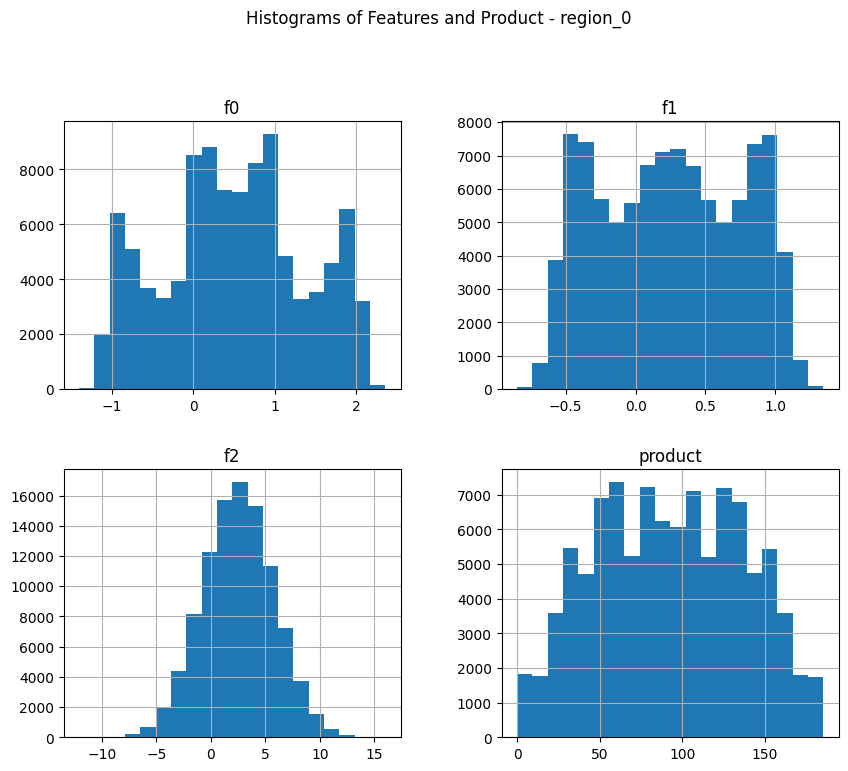

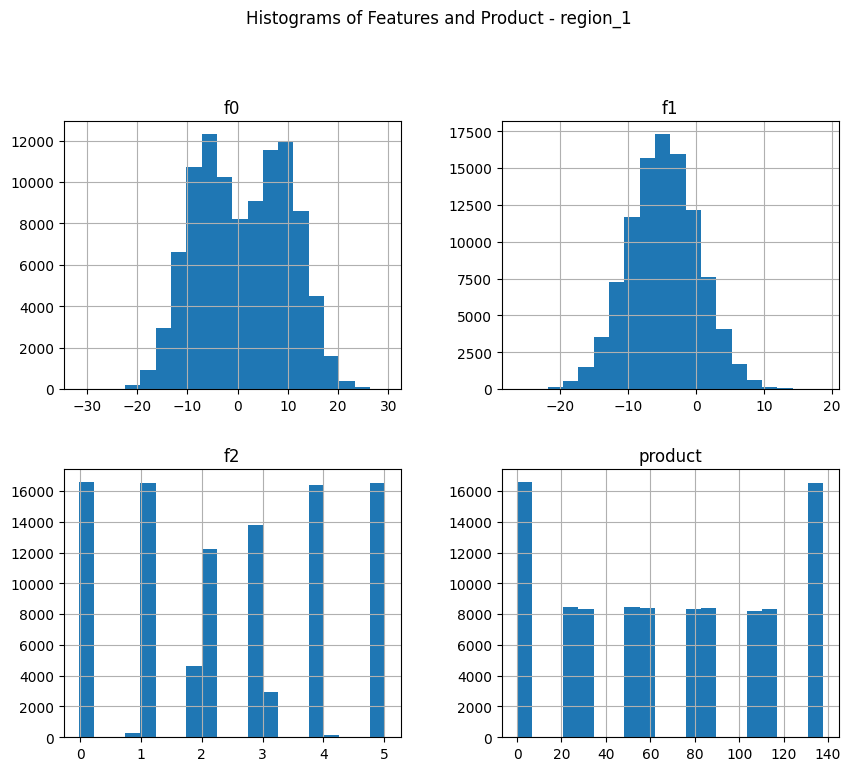

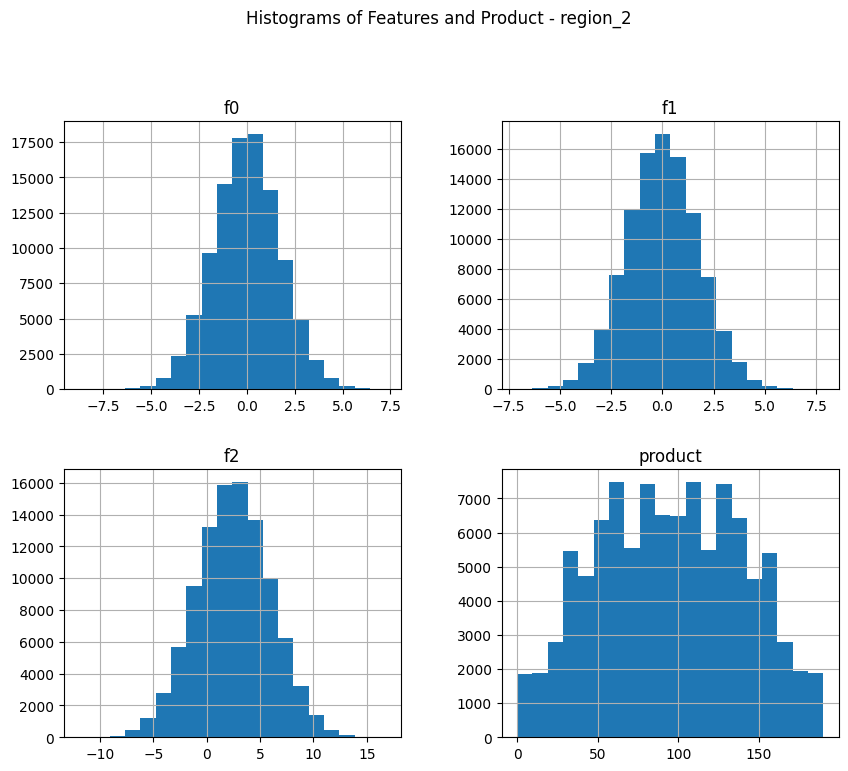

In [10]:
# 1. Histograms
regions_data = {'region_0': geo_df_0, 'region_1': geo_df_1, 'region_2': geo_df_2}
for region_name, df in regions_data.items():
    df[['f0', 'f1', 'f2', 'product']].hist(bins=20, figsize=(10, 8))
    plt.suptitle(f'Histograms of Features and Product - {region_name}', y=1.02)
    plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Broken code
    
</div>

<div class="alert alert-block alert-info">
<b>Student answer A1 .</b> <a class="tocSkip"></a>

Broken code resolved
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed
    
</div>

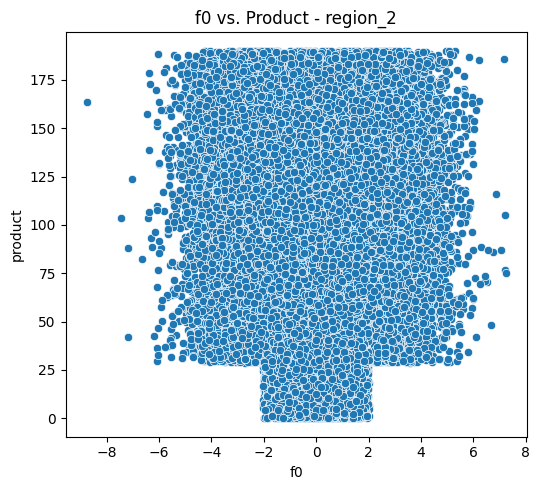

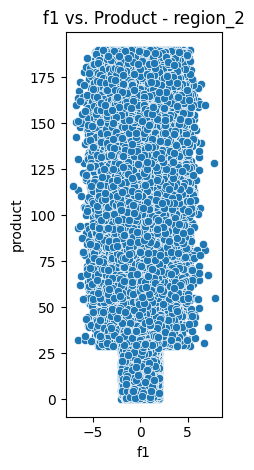

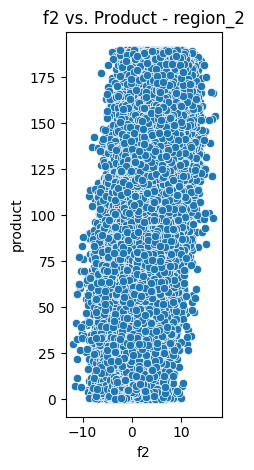

In [11]:
# Scatter plots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['f0', 'f1', 'f2']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['product'])
    plt.title(f'{feature} vs. Product - {region_name}')
    plt.tight_layout()
    plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Broken code
    
</div>

<div class="alert alert-block alert-info">
<b>Student answer A1 .</b> <a class="tocSkip"></a>

Broken code resolved
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed
    
</div>

## Train and test the model for each region

In [12]:
regions_data = {'region_0': geo_df_0, 'region_1': geo_df_1, 'region_2': geo_df_2}
models = {}
predictions = {}
true_values = {}
rmse_values = {}

for region_name, df in regions_data.items():
    print(f"\n--- Training and testing model for {region_name} ---")

    # 2.1. Split the data into a training set and validation set at a ratio of 75:25.
    features = df[['f0', 'f1', 'f2']]
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=42
    )

    # 2.2. Train the model make predictions for the validation set.
    model = LinearRegression()
    model.fit(features_train, target_train)
    models[region_name] = model

    # 2.3. Save the predictions and correct answers for the validation set.
    predicted_valid = model.predict(features_valid)
    predictions[region_name] = predicted_valid
    true_values[region_name] = target_valid

    # 2.4. Print average predicted volume and RMSE
    avg_predicted_volume = predicted_valid.mean()
    rmse = mean_squared_error(target_valid, predicted_valid, squared=False)
    rmse_values[region_name] = rmse
    print(f"Average predicted volume of reserves: {avg_predicted_volume:.2f} thousand barrels")
    print(f"RMSE of the model: {rmse:.2f}")


--- Training and testing model for region_0 ---
Average predicted volume of reserves: 92.40 thousand barrels
RMSE of the model: 37.76

--- Training and testing model for region_1 ---
Average predicted volume of reserves: 68.71 thousand barrels
RMSE of the model: 0.89

--- Training and testing model for region_2 ---
Average predicted volume of reserves: 94.77 thousand barrels
RMSE of the model: 40.15


**From the above results**
* Region 1 model is significantly more accurate (very low RMSE of 0.89) compared to Regions 0 and 2.
* Regions 0 and 2 models have higher prediction error (RMSE of 37.76 and 40.15, respectively), indicating lower precision.
* Average predicted reserve volumes vary by region, with Regions 0 and 2 having higher averages than Region 1.

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Good job!
    
</div>

## Prepare for profit calculation

In [13]:
# Project parameters
BUDGET = 100_000_000  # Budget for 200 wells in USD
NUM_WELLS = 200       # Number of top wells to consider
REVENUE_PER_PRODUCT = 4500 # Revenue per 1000 barrels in USD
NUM_SAMPLES = 1000    # Number of bootstrap samples

# 3.1. Store key values
WELLS_TO_DEVELOP = 200
TOTAL_BUDGET = 100_000_000
REVENUE_PER_BARREL = 4.5
THOUSAND_BARRELS = 1000

# 3.2. Calculate break-even volume
cost_per_well = TOTAL_BUDGET / WELLS_TO_DEVELOP
break_even_volume_per_well = cost_per_well / (REVENUE_PER_BARREL * THOUSAND_BARRELS)

print(f"\nCost to develop one well: ${cost_per_well:.2f}")
print(f"Break-even volume of reserves per well: {break_even_volume_per_well:.2f} thousand barrels")

# Compare with average reserves in each region
print("\nAverage actual volume of reserves per well in each region:")
for region_name, df in regions_data.items():
    avg_actual_volume = df['product'].mean()
    print(f"{region_name}: {avg_actual_volume:.2f} thousand barrels")

# 3.3. Findings about the preparation for profit calculation
print("\nFindings for profit calculation preparation:")
print(f"The break-even volume per well is {break_even_volume_per_well:.2f} thousand barrels.")
print("Comparing this to the average actual reserves in each region will give us a preliminary idea of potential profitability.")


Cost to develop one well: $500000.00
Break-even volume of reserves per well: 111.11 thousand barrels

Average actual volume of reserves per well in each region:
region_0: 92.50 thousand barrels
region_1: 68.83 thousand barrels
region_2: 95.00 thousand barrels

Findings for profit calculation preparation:
The break-even volume per well is 111.11 thousand barrels.
Comparing this to the average actual reserves in each region will give us a preliminary idea of potential profitability.


**The calculated break-even volume per well (111.11 thousand barrels) is higher than the average actual reserves in all three regions. This implies that simply drilling wells at random in any region is likely to result in losses on average. We need to be selective.**

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Well done!
    
</div>

## Write a function to calculate profit from a set of selected oil wells and model predictions

In [14]:

def calculate_profit(predictions, target, num_best_wells, revenue_per_product, budget):
    """Calculates the profit from the top predicted oil wells."""
    top_well_indices = predictions.argsort()[-num_best_wells:]
    selected_predictions = predictions[top_well_indices]
    total_volume = selected_predictions.sum()
    profit = (total_volume * revenue_per_product) - budget
    return profit

# Calculate profit for each region
profits = {}
for region_name in regions_data.keys():
    profit = calculate_profit(
        predictions[region_name],
        true_values[region_name].values, # Using true values for profit calculation as per instructions
        NUM_WELLS,
        REVENUE_PER_PRODUCT,
        BUDGET
    )
    profits[region_name] = profit
    print(f"\nPotential profit for {region_name} (using top {NUM_WELLS} predictions): ${profit:.2f}")

# Pick the region with the highest profit (based on predictions on the validation set)
best_region_profit = max(profits, key=profits.get)
print(f"\nBased on the initial model predictions on the validation set, the region with the highest potential profit is {best_region_profit}.")


Potential profit for region_0 (using top 200 predictions): $38966584.80

Potential profit for region_1 (using top 200 predictions): $24869381.15

Potential profit for region_2 (using top 200 predictions): $33779815.14

Based on the initial model predictions on the validation set, the region with the highest potential profit is region_0.


**Based on the top 200 predicted wells in the validation set, Region 0 shows the highest potential profit ($38.97 million), followed by Region 2 and then Region 1. This initial assessment suggests Region 0 might be the most lucrative**

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

The function looks correct. Great work!
    
</div>

## Calculate risks and profit for each region:

In [15]:
rng = np.random.RandomState(42) # For reproducibility
region_profits_bootstrap = {}

for region_name in regions_data.keys():
    print(f"\n--- Bootstrapping for {region_name} ---")
    profits_bootstrap = []
    df_valid = pd.DataFrame({'predicted': predictions[region_name], 'target': true_values[region_name]})
    n_samples = df_valid.shape[0]
    num_study_points = 500  # Number of random wells to sample

    for _ in range(NUM_SAMPLES):
        # Sample 500 random wells with replacement
        sampled_df = df_valid.sample(n=num_study_points, replace=True, random_state=rng)

        # Pick the top 200 predicted wells from the sample
        top_predicted = sampled_df.sort_values(by='predicted', ascending=False).head(NUM_WELLS)
        total_volume = top_predicted['target'].sum() # Use actual target values for profit

        profit = (total_volume * REVENUE_PER_PRODUCT) - BUDGET
        profits_bootstrap.append(profit)

    region_profits_bootstrap[region_name] = np.array(profits_bootstrap)

# Analyze the bootstrap results
print("\n--- Analyzing Bootstrap Results ---")
for region_name, profits in region_profits_bootstrap.items():
    avg_profit = profits.mean()
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = (profits < 0).mean() * 100

    print(f"\nRegion: {region_name}")
    print(f"Average profit: ${avg_profit:.2f}")
    print(f"95% Confidence Interval: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")
    print(f"Risk of loss: {risk_of_loss:.2f}%")

# Select the best region based on risk and average profit
best_region_final = None
highest_avg_profit = -np.inf
risk_threshold = 2.5

print("\n--- Selecting the Best Region ---")
for region_name, profits in region_profits_bootstrap.items():
    risk_of_loss_percentage = (profits < 0).mean() * 100
    avg_profit = profits.mean()
    if risk_of_loss_percentage < risk_threshold:
        if avg_profit > highest_avg_profit:
            highest_avg_profit = avg_profit
            best_region_final = region_name

if best_region_final:
    print(f"Based on the bootstrapping analysis, the recommended region for oil well development is {best_region_final} with an average profit of ${highest_avg_profit:.2f} and a risk of loss below {risk_threshold}%.")
else:
    print(f"No region meets the risk of loss criteria (< {risk_threshold}%).")


--- Bootstrapping for region_0 ---

--- Bootstrapping for region_1 ---

--- Bootstrapping for region_2 ---

--- Analyzing Bootstrap Results ---

Region: region_0
Average profit: $3995754.78
95% Confidence Interval: [-1104678.95, 8974603.28]
Risk of loss: 6.00%

Region: region_1
Average profit: $4525765.94
95% Confidence Interval: [523094.10, 8301463.13]
Risk of loss: 0.90%

Region: region_2
Average profit: $3787059.04
95% Confidence Interval: [-1277794.35, 9079234.83]
Risk of loss: 7.50%

--- Selecting the Best Region ---
Based on the bootstrapping analysis, the recommended region for oil well development is region_1 with an average profit of $4525765.94 and a risk of loss below 2.5%.


**Region 1 stands out as the best choice due to its highest average profit (around $4.5 million) and, most importantly, its very low risk of loss (0.90%), satisfying the project's risk criteria. Regions 0 and 2 have higher risks of incurring losses. Therefore, Region 1 is the recommended region for oil well development.**

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>
 
Unfortunately, the results are wrong. In the correct results risk in each region is a value between 0 and 10 but not exact 0 or exact 100. Moreover, risks in different regions should be different.
    
1. In the bootstrap we always must sample with replace=True. Without it bootstrap doesn't work at all.
2. According to the task description, inside the bootstrap loop you need to sample 500 random wells but n_samples random wells.
    
In the lesson you have an example of bootstrap for the task about students and lessons. I'd recommend to repeat this task because here the idea is the same and so the code is almost the same as well.
    
</div>

<div class="alert alert-block alert-info">
<b>Student answer A1 .</b> <a class="tocSkip"></a>

I have corrected the cose to have new resk values as 6.00%, 0.90% and 7.5% for the regions respectively
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

The results are correct now. Good job! But inside the bootstrap loop you need to use `calculate_profit` function. This is the only one reason why you wrote this function above.
    
</div>

## CONCLUSION
Region 1 is the most favorable option. It presents a solid average profit (around $4.5 million) coupled with a very low risk of loss (0.90%), which meets the project's requirement of a risk below 2.5%. While Regions 0 and 2 show comparable average profits, their significantly higher risks of loss make Region 1 the more prudent and recommended choice for OilyGiant's new well development.